In [15]:
import numpy as np
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt

In [2]:
# 1 - погрешность данного приближения по производной
# f(x) = 1.2*x4 - 9.7*х2 - 5*x + 7.5.

def dfdx(x):
    return 4.8*x**3 - 19.4*x - 5

xi = 1.7

print(dfdx(xi))
print(np.round(abs(dfdx(xi)),2))

-14.3976
14.4


In [70]:
# 2 - Метод Ньютона
#  f(x) = 1.7*x4 - 8.1*х2 - 5*x + 1.8

def f(x):
    return 1.7*x**4 - 8.1*x**2 - 5*x + 1.8

def g(x):
    return 6.8*x**3 - 16.2*x - 5

def h(x):
    return 20.4*x**2 - 16.2

x0 = 2.9

# Метод Ньютона
def newton(dfdx, df2dx, x0, eps_g = 0.01, maxsteps=5):
    nf = 0
    print(x0, dfdx(x0))
    # while abs(dfdx(x0)) > eps_g:
    x0 = x0 - dfdx(x0)/df2dx(x0)
    nf += 2
        # if nf > maxsteps:
            # break
    return x0, dfdx(x0), nf


res = newton(g, h, x0)
print(res)
print(np.round(res, 2))

2.9 113.86519999999999
(2.1671069230967275, 29.0998531191106, 2)
[ 2.17 29.1   2.  ]


1.5278640450004208 2.472135954999579
10.757388591019742 22.719377170728976
0 2.472135954999579
1.2360679774997896
1.24
(1.2360679774997896, 1.2360679774997896, 2)


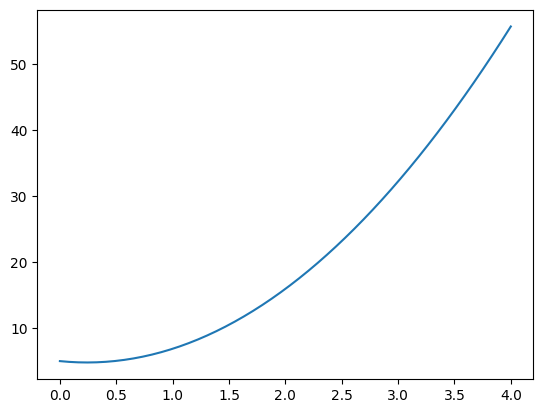

In [35]:
# 3 - Золотое сечение

#  f(x) = 3.6*x2 - x*√3 + 5.0

def f(x):
    return 3.6*x**2 - x*np.sqrt(3) + 5.0

a, b = 0, 4.0


# Метод золотого сечения
def gs(f, a, b, eps_x=0.025):
    nf = 0
    tau = (1 + np.sqrt(5))/2

    if (b-a)/2 > eps_x:
        coeff = (b-a)/tau
        x1 = b - coeff
        x2 = a + coeff
        f1 = f(x1)
        f2 = f(x2)
        nf += 2

        print(x1, x2)
        print(f1, f2)

        if f1 < f2:
            b = x2
            print(a, b)
            print((a+b)/2)
            print(np.round((a+b)/2, 2))
            # x2 = x1
            # coeff = (b-a)/tau
            # x1 = b - coeff
            # f2 = f1
            # f1 = f(x1)
            # nf += 1
        elif f1 > f2:
            a = x1
            x1 = x2
            coeff = (b-a)/tau
            x2 = a + coeff
            f1 = f2
            f2 = f(x2)
            nf += 1
        else:
            a = x1
            b = x2
            coeff = (b-a)/tau
            x1 = b - coeff
            x2 = a + coeff
            f1 = f(x1)
            f2 = f(x2)
            nf += 2
    return (a+b)/2, (b-a)/2, nf

print(gs(f, a, b))

x = np.linspace(a, b, 50)
plt.plot(x, f(x))

0 1.0000001 0.50000005 0.50000005 2
0 0.50000015 0.250000075 0.250000075 4
0 0.250000175 0.1250000875 0.1250000875 6
(0.1250000875, 0.1250000875, 6)


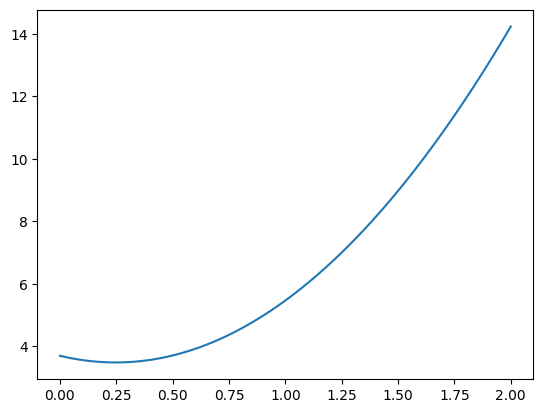

In [33]:
# 4 - Метод Дихотомии
# f(x) = 3.5*x2 - x*√3 + 3.7

def f(x):
    return 3.5*x**2 - x*np.sqrt(3) + 3.7

a, b = 0, 2.

# Метод дихотомии
def dihot(f, a, b, dx=0.01, eps_x=0.001, count=3):
    nf = 0
    # while (b-a)/2 > eps_x:
    for _ in range(count):
        x1 = (a+b)/2 - dx
        x2 = (a+b)/2 + dx
        f1 = f(x1)
        f2 = f(x2)
        nf += 2
        if f1 < f2:
            b = x2
        elif f1 > f2:
            a = x1
        else:
            a = x1
            b = x2
        print(a, b, (a+b)/2, (b-a)/2, nf)
    return (a+b)/2, (b-a)/2, nf

print(dihot(f, a, b, dx=1e-7))

x = np.linspace(0, 2, 50)
plt.plot(x, f(x))



In [71]:
# 5 Погрешность по градиенту

#  f(x,y) =2.9* x2 -5.9*х + y2
# (0.5; 0.6)

def f(x, y):
    return 2.9*x**2 - 5.9*x + y**2

def g(x, y):
    return (5.8*x - 5.9, 2*y)

x, y = 0.5, 0.6

res = g(x, y)
print(res)
print(norm(res, ord = 2))


(-3.0000000000000004, 1.2)
3.2310988842807027


In [61]:
# 6 - Метод Нелдера и Мида

# f(x,y) = x2 - 2х + y4
# v1(0;2), v2(0,4), v3(-1; 2.0)

def f(x, y):
    return x**2 - 2*x + y**4

Xsimplex = np.array([[0, 2.], [0, 4.], [-1., 2.]])
print(Xsimplex)

s1 = np.array([0, 2.])
s2 = np.array([0, 4.])
s3 = np.array([-1., 2.])

print(f(s1[0],s1[1]), f(s2[0],s2[1]), f(s3[0],s3[1]))

x_bad = s2
print('Bad:', x_bad)
x_center = (s1 + s3)/2
print('Center:', x_center)


news2 = x_center + (x_center - x_bad)
print('New:', news2)
print('X1:', f(news2[0], news2[1]))

news2x2 = x_center + 2*(x_center - x_bad)
print('NewX2:', news2x2)
print('X2:', f(news2x2[0], news2x2[1]))

[[ 0.  2.]
 [ 0.  4.]
 [-1.  2.]]
16.0 256.0 19.0
Bad: [0. 4.]
Center: [-0.5  2. ]
New: [-1.  0.]
X1: 3.0
NewX2: [-1.5 -2. ]
X2: 21.25


In [68]:
# 7 - Метод Ньютона

# f(x,y) =5.4* x2 -7.2*х + y4+10


def newton(f, g, h, x0, eps_g=0.01, max_iters=1000):
    gv = g(x0)
    x_trace = [x0]
    iter = 0
    # while (norm(gv, ord=2) > eps_g) or (iter < max_iters):
    x = x_trace[-1].copy()
    hm = h(x)
    dx = solve(hm, -gv)
    x += dx
    return x
    # gv = g(x)
    # x_trace.append(x)
    # iter +=1
    # return np.array(x_trace)

def f(x):
    return 5.4*x[0]**2 - 7.2*x[0] + x[1]**4 + 10

def g(x):
    return np.array([10.8*x[0] - 7.2, 4*x[1]**3])

def h(x):
    return np.array([[10.8, 0],[0, 12*x[1]**2]])

x0 = np.array([0.8, 0.3])

print(f(x0))

res = newton(f, g, h, x0)
print(res)

print(f(res))


7.7041
[0.66666667 0.2       ]
7.6015999999999995
